To write on
- Permutation
- Combination
- Factorial
- Conditional Probability
- Total Probability
- Bayes Rule

Compute the factorial of a number using numpy, the Python math module and scipy

In [4]:
import handcalcs.render
import numpy as np
import math
import scipy as sp

factorial = np.math.factorial(5)

fact_2 = math.factorial(5)

fact_3 = sp.special.factorial(5)
fact_3

120.0

Number of ways to choose r objects from a set of n objects without repetition and without regard to the order of the objects.

In [5]:
%%render
import math

n = 5
r = 2

nCr = math.comb(n, r)
print(nCr)

IndexError: pop from an empty deque

Number of arrangements of r objects from a set of n objects without repetition and witho regard to the order of the objects.

In [ ]:
import math

n = 5
r = 2

nPr = math.perm(n, r)
print(nPr)

20


Binomial Probability Distribution Function, is given by the formula:
$$ P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} $$

where $X$ is the number of successes in $n$ independent trials, $k$ is the number of successes, $p$ is the probability of success in a single trial, $\binom{n}{k}$ is the binomial coefficient, which represents the number of ways to choose $k$ items from a set of $n$ distinct items, and is calculated as:

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$ 


In [ ]:
from scipy.stats import binom

N = 400 # Number of independent Bernoulli Trials
x = list(range(401)) # Number of Successes
p = 0.01


y = binom.pmf(x, N, p) # Binomial probability distribution(density) function with parameter x and p

Poisson Probability Distribution Function, is given by the formula:
$$ P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

where $X$ is the number of events in a fixed interval of time or space, $\lambda$ is the average number of events per interval, and $k$ is the number of events that occur in that interval.


In [ ]:
from scipy.stats import poisson

Lambda = N * p # Probability of Success
z = poisson.pmf(x, Lambda) # Poisson PDF with parameter x and lambda

Plotting the probability against the Bernoulli Trials

Text(0, 0.5, 'Probability')

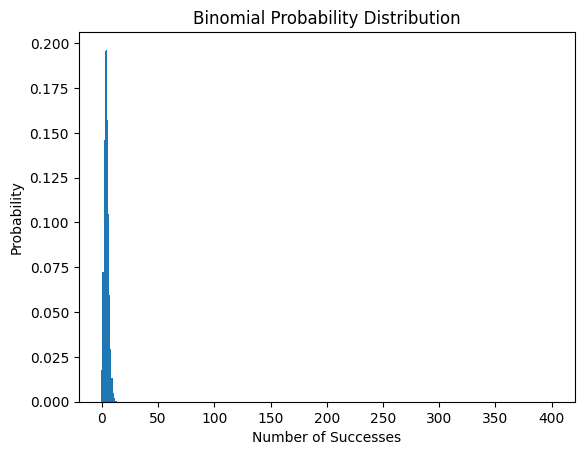

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x,y,1)
plt.title("Binomial Probability Distribution")
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

Plotting the probability against the trials

Text(0.5, 1.0, 'Poisson Probability Distribution')

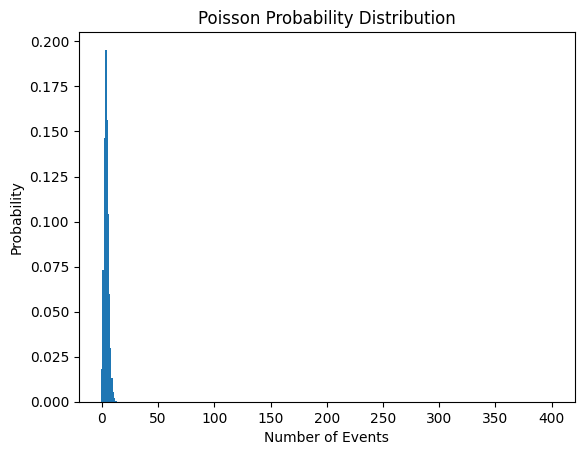

In [ ]:

plt.bar(x, z, 1) # Histogram of outputs
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title("Poisson Probability Distribution")

Normality Test. 

Text(0, 0.5, 'Probability')

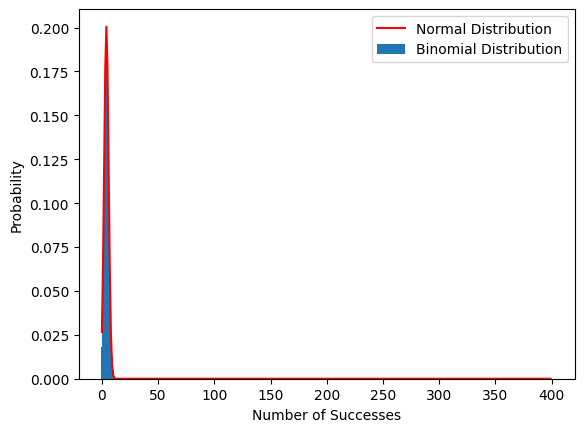

In [ ]:
import math 
from scipy.stats import norm
import numpy as np

mu = N*p
sigma = math.sqrt(mu*(1-p))
x2 = np.arange(0, N)
y2 = norm.pdf(x2, mu, sigma)
plt.bar(x,y,1, label='Binomial Distribution')
plt.plot(x2, y2, label='Normal Distribution', color='red')
plt.legend()
plt.xlabel('Number of Successes')
plt.ylabel('Probability')


Negative Binomial Probability Distribution Function, is given by the formula:
$$ P(X=x) = \binom{x-1}{r-1} p^r (1-p)^{x-r} $$

where $X$ is the number of trials needed to produce $r$ successes, $p$ is the probability of success in a single trial, $\binom{x-1}{r-1}$ is the binomial coefficient, which represents the number of ways to choose $r-1$ items from a set of $x-1$ distinct items.

### A sample question on negative binomial probability 
A person conducting telephone surveys must get 3 more completed surveys before their job is finished. <br>
On each randomly dialed number, there is a 9% chance of reaching an adult who will complete the survey. <br>
What is the probability that the 3rd completed survey occurs on the 10th call?
$$ r = 3, p = 0.09, P(X=10) $$

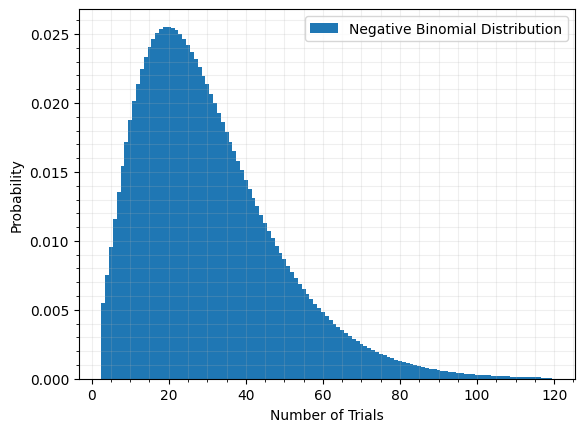

In [ ]:
import numpy as np
from scipy.stats import nbinom
import seaborn as sns

# Set the number of successes required
r = 3

# Set the probability of success in each Bernoulli trial
p = 0.09
 
k = np.arange(3, 120)
y2 = nbinom.pmf(k, r, p)
plt.bar(k,y2,1, label='Negative Binomial Distribution')
plt.legend()
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.grid(which="both", axis="both", alpha=0.2)
plt.minorticks_on()

# sns.displot(data=y2, x="flipper_length_mm", kind="kde")



In [ ]:
from scipy.stats import nbinom
nbinom.pmf(5,3,0.6)

0.04644863999999997

### Hypergeometric Distribution

Hypergeometric Probability Distribution Function, is given by the formula:
$$ P(X=x) = \frac{\binom{a}{x} \binom{N-a}{n-x}}{\binom{N}{n}} $$

where 
<br>
- X : number of successes in the sample
- N : population size
- a : number of successes
- n : sample size



Suppose a large high school has 1100 female students and 900 male students.

A random sample of 10 students is drawn. What is the probability that exactly 7 of the selected students are female?
 Solution 

N = 2000 students, n = 10 students, $ x = 7 $ , a = 1100

The probability of getting 7 successes in a sample of 10 draws is 0.166490.


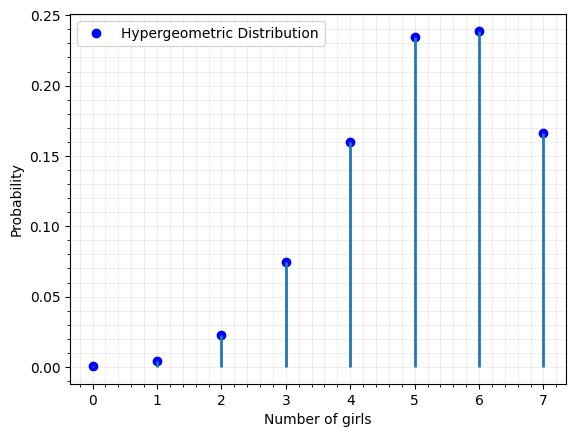

In [ ]:
import numpy as np
from scipy.stats import hypergeom

# Define the parameters of the distribution
N = 2000    # population size
K = 10    # number of draws 
n = 1100    # number of successes in the population
k = np.arange(0, 8) # number of successes in the sample
pmf = hypergeom.pmf(k, N, n, K) # Calculate the pmf

plt.plot(k, pmf, 'bo', label='Hypergeometric Distribution')
plt.legend(loc="upper left")
plt.xlabel('Number of girls')
plt.ylabel('Probability')
plt.grid(which="both", axis="both", alpha=0.2)
plt.minorticks_on()
plt.vlines(k, 0, pmf, lw=2)

# Print the result
print(f"The probability of getting {k[7]} successes in a sample of {K} draws is {pmf[7]:.6f}.")

### Geometric Distribution

Geometric Probability Distribution Function, is given by the formula:
$$ P(X=x) = (1-p)^{x-1}p $$

where 
<br>
- X : number of trials need to get the first success 
- p : probability of success


In a large population of adults, 30% have received CPR training. 

If adults from this population are randomly seleced, what is the probability that the 6th person sampled is the first that has received CPR training.

Probability that the 6th person sampled is the first that has received CPR training is 0.050421.
{1: 0.3, 2: 0.21, 3: 0.14699999999999996, 4: 0.10289999999999998, 5: 0.07202999999999998, 6: 0.05042099999999998, 7: 0.035294699999999984, 8: 0.02470628999999999, 9: 0.01729440299999999, 10: 0.012106082099999993, 11: 0.008474257469999994, 12: 0.005931980228999996, 13: 0.0041523861602999965, 14: 0.0029066703122099975, 15: 0.002034669218546998}


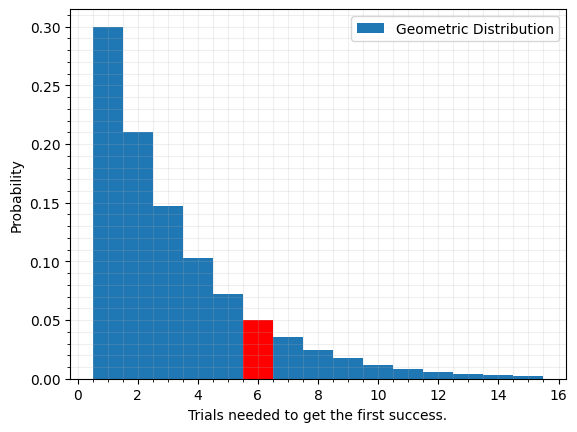

In [ ]:
import numpy as np
from scipy.stats import geom

# Define the parameters of the distribution
p = 0.3
x = np.arange(1,16)
geompmf = geom.pmf(x, p) # Calculate the pmf

# plt.plot(x, geompmf, 'ro', label='Hypergeometric Distribution')
barchart = plt.bar(x, geompmf, 1, label='Geometric Distribution')
plt.legend(loc="best")
plt.xlabel('Trials needed to get the first success.')
plt.ylabel('Probability')
plt.grid(which="both", axis="both", alpha=0.2)
plt.minorticks_on()

# 
barchart[5].set_facecolor('red')
# plt.vlines(x, 0, geompmf, lw=2, colors=("red"))

# Print the result
print(f"Probability that the {x[5]}th person sampled is the first that has received CPR training is {geompmf[5]:.6f}.")
print(dict(zip(x, geompmf)))


# Normal Distribution

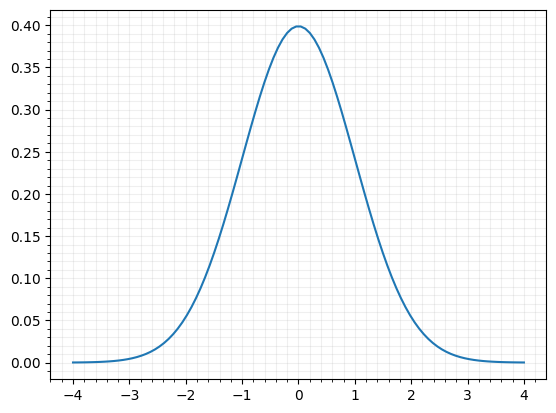

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu, sigma = 0, 1
x = np.linspace(-4, 4, 100)
pdf = norm.pdf(x, mu, sigma)
plt.grid(which="both", axis="both", alpha=0.2)
plt.minorticks_on()
plt.plot(x, pdf)


# Beta Distribution

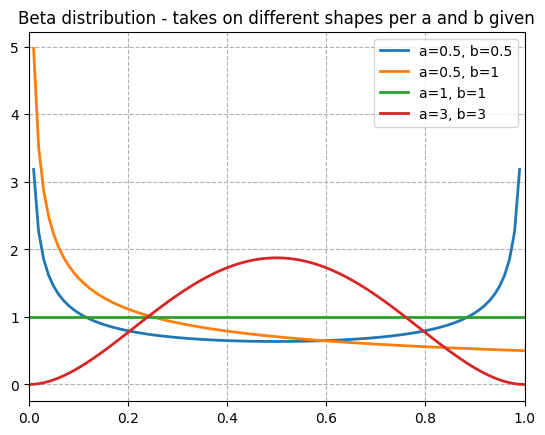

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

pd_beta = beta(0.5, 0.5)
x_beta = np.linspace(0, 1, 100)
pdf_beta = pd_beta.pdf(x_beta)

plt.plot(x_beta, pdf_beta, linewidth=2)
plt.xlim(0, 1)

pd_beta2 = beta(0.5, 1)
pdf_beta2 = pd_beta2.pdf(x_beta)
plt.plot(x_beta, pdf_beta2, linewidth=2)

pd_beta3 = beta(1, 1)
pdf_beta3 = pd_beta3.pdf(x_beta)
plt.plot(x_beta, pdf_beta3, linewidth=2)

pd_beta4 = beta(3, 3)
pdf_beta4 = pd_beta4.pdf(x_beta)
plt.plot(x_beta, pdf_beta4, linewidth=2)

plt.title("Beta distribution - takes on different shapes per a and b given")
plt.legend(["a=0.5, b=0.5", "a=0.5, b=1", "a=1, b=1", "a=3, b=3"])
plt.grid(True, which='both', linestyle='--')


# Gamma distribution

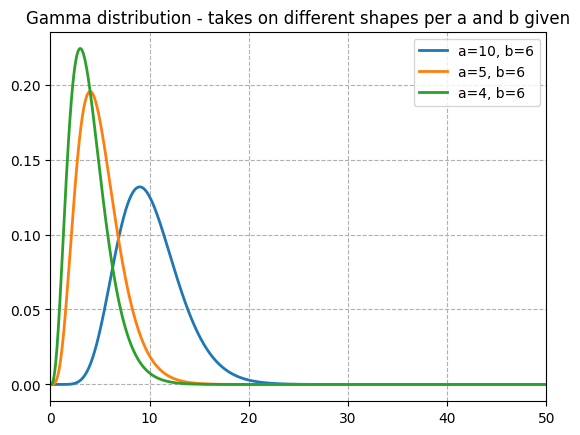

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

pd_gamma = gamma(a=10)
x_gamma = np.linspace(0, 50, 1000)
pdf_gamma = pd_gamma.pdf(x_gamma)

plt.plot(x_gamma, pdf_gamma, linewidth=2)
plt.xlim(0, 50)

pd_gamma2 = gamma(a=5)
pdf_gamma2 = pd_gamma2.pdf(x_gamma)
plt.plot(x_gamma, pdf_gamma2, linewidth=2)

pd_gamma3 = gamma(a=4)
pdf_gamma3 = pd_gamma3.pdf(x_gamma)
plt.plot(x_gamma, pdf_gamma3, linewidth=2)


plt.title("Gamma distribution - takes on different shapes per a and b given")
plt.legend(["a=10, b=6", "a=5, b=6", "a=4, b=6"])
plt.grid(True, which='both', linestyle='--')


The probability density function (PDF) of the Weibull distribution is:

$f(x;k,\lambda)=\begin{cases}
\dfrac{k}{\lambda}\left(\dfrac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^{k}},&x\geq 0\\
0, &\text{otherwise}
\end{cases}$

where <br> $k>0$ is the shape parameter (also known as the Weibull shape parameter) <br> $\lambda>0$ is the scale parameter.

The PDF describes the probability of observing a particular value $x$ in the Weibull distribution. The PDF is non-negative for $x\geq 0$, and the total area under the curve is equal to 1, as required for a probability distribution function.